In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
BENCH_DIR="bench_results"

benchmarks = {}
scheduling_bench = {}

for bench_file in os.listdir(BENCH_DIR):
    with open(os.path.join(BENCH_DIR, bench_file)) as f:
        bench = json.load(f)
        name = bench_file.split(".")[0]
        # TODO: take not only last bench
        if "benchmarks" in bench:
            res = bench["benchmarks"][-1]
            if "real_time" in res:
                benchmarks[name] = res["real_time"]
            elif "manual_time" in res:
                benchmarks[name] = res["manual_time"]
            elif "cpu_time" in res:
                benchmarks[name] = res["cpu_time"]
        elif name.startswith("bench_scheduling"):
            scheduling_bench[name] = bench

In [5]:
def plot_benchmark(benchmarks, title):
    benchmarks = sorted(benchmarks.items(), key=lambda x: x[0])
    min_time = sorted(benchmarks, key=lambda x: x[1])[0][1]
    # normalize to min time (1.0 - min time, other times are relative to min time)
    benchmarks = [(name, min_time / time) for name, time in benchmarks]
    title = "Normalized perfomance of " + title
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.barh(*zip(*benchmarks))
    plt.show()

In [6]:
def split_bench_name(s):
    s = s.split("_")
    prefix = []
    for part in s:
        if part.islower():
            prefix.append(part)
        else:
            break
    return "_".join(prefix), "_".join(s[len(prefix):])

benchmarks_by_type = {}
for name, bench in benchmarks.items():
    bench_type, bench_mode = split_bench_name(name)
    if bench_type not in benchmarks_by_type:
        benchmarks_by_type[bench_type] = {}
    benchmarks_by_type[bench_type][bench_mode] = bench

In [7]:
for bench_type, bench in benchmarks_by_type.items():
    plot_benchmark(bench, bench_type)

In [13]:
scheduling_times = {}
for bench_type, res in scheduling_bench.items():
    # print thread num, used threads
    print(bench_type, res["thread_num"], res["used_threads"])
    if res["thread_num"] != res["used_threads"]:
        print(f"Maybe something went wrong with {bench_type}: not all threads were used")
    scheduling_times[bench_type] = res["start_times"]

bench_scheduling_TBB_CONST_AFFINITY 10 10
bench_scheduling_TBB_AUTO 10 10
bench_scheduling_TBB_SIMPLE 10 10
bench_scheduling_OMP_RUNTIME 10 10
bench_scheduling_OMP_GUIDED 10 10
bench_scheduling_OMP_STATIC 10 10
bench_scheduling_OMP_DYNAMIC 10 10
bench_scheduling_TBB_AFFINITY 10 10


bench_scheduling_TBB_CONST_AFFINITY [600529, 713699, 743899, 749765, 760817, 770989, 783070, 802143, 810129, 814209]
bench_scheduling_TBB_AUTO [626366, 722535, 737516, 749537, 811663, 813149, 845334, 858519, 862647, 864242]
bench_scheduling_TBB_SIMPLE [612666, 712844, 720419, 724530, 731485, 755573, 762396, 767727, 778844, 789932]
bench_scheduling_OMP_RUNTIME [3534607, 3534658, 3535164, 3535191, 3535228, 3535237, 3535266, 3535289, 3535306, 3535308]
bench_scheduling_OMP_GUIDED [3640458, 3640462, 3640516, 3640520, 3640540, 3640558, 3640618, 3640683, 3640749, 3640773]
bench_scheduling_OMP_STATIC [5266085, 5266119, 5266981, 5266984, 5267064, 5267066, 5267071, 5267074, 5271973, 5276719]
bench_scheduling_OMP_DYNAMIC [237606, 238051, 238055, 238141, 238177, 238182, 238218, 238222, 238226, 238230]
bench_scheduling_TBB_AFFINITY [613022, 733073, 757956, 759335, 780018, 795176, 797650, 802566, 815277, 823602]


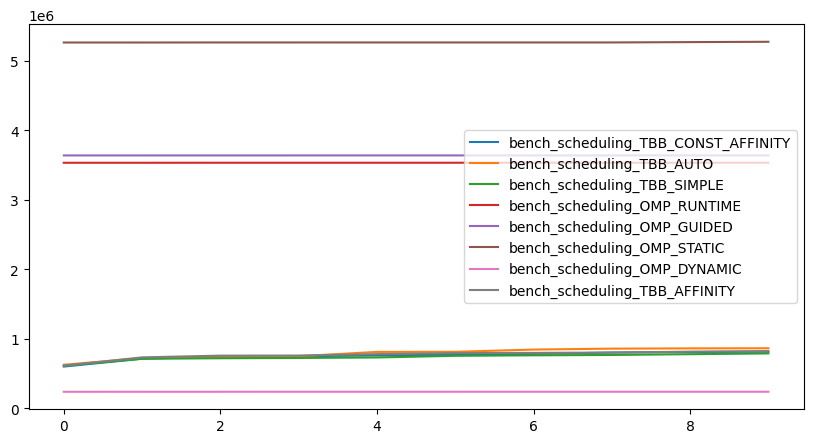

In [34]:
# x for thread_idx, y for time
plt.figure(figsize=(10, 5))
for bench_type, times in scheduling_times.items():
    print(bench_type, times)
    plt.plot(range(len(times)), times, label=bench_type)
plt.legend()
plt.show()

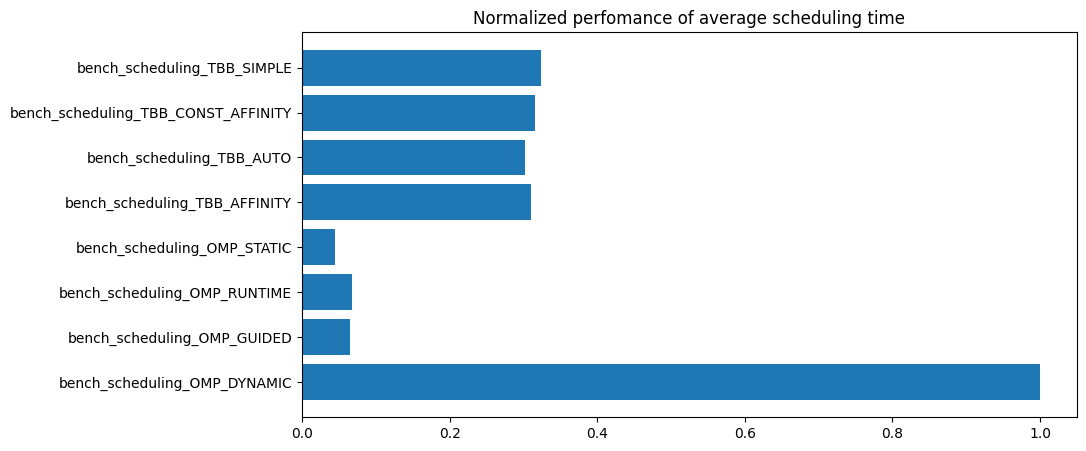

In [33]:
# plot average scheduling time for all benchs
avg_times = {}
for bench_type, times in scheduling_times.items():
    avg_times[bench_type] = sum(times) / len(times)
plot_benchmark(avg_times, "average scheduling time")